In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
# Za prikaz grafov neposredno v Jupyter Notebook

In [1]:
"""Ta modul vsebuje implementacijo razreda (5,0)-Nanotubičnega fulerena."""

import math
from typing import Union

import matplotlib.pyplot as plt
import networkx as nx


class ntf:
    """
    Razred za predstavitev (5,0)-Nanotubičnega fulerena z več orbitalami.

    Molekularna struktura: C_{10k}, kjer je k = 2, 3, 4, ...

    Atributi:
    --------
        k (int): Red molekule, ki določa število orbital.
        zigzag (bool): Določa, ali se povezave dekagonov izmenjujejo med sodimi ali lihimi vozlišči.
        G (networkx.Graph): Grafična predstavitev molekule.
        pos (dict): Pozicije vozlišč za vizualizacijo.

    Metode:
    --------
        plot_graph(): Nariše grafično predstavitev molekule.
        convert_graph(): Pretvori graf NetworkX v določeno predstavitev.
    """

    def __init__(self, k: int, zigzag: bool = True) -> None:
        self.k: int = k
        self.zigzag: bool = zigzag
        self.G: nx.Graph = None
        self.pos: dict = None
        self.create_graph()

    @staticmethod
    def validate_order_class(k: int) -> None:
        """
        Preveri veljavnost reda molekule.

        Parametri:
        --------
            k (int): Red molekule, ki določa število orbital.

        Izjeme:
        --------
            ValueError: Če je k manjše od 2.
        """
        if k < 2:
            raise ValueError("Red molekule (k) mora biti >= 2.")

    def create_graph(self) -> None:
        """Ustvari nx-graf za (5,0)-Nanotubični fuleren."""
        self.G = nx.Graph()
        self.pos = {}

        # Število dekagonalnih orbital (brez pentagonalnih plasti)
        n: int = self.k - 1

        # Dodaj centralni pentagon (0-ta orbita)
        for i in range(5):
            angle = i * 2 * math.pi / 5 + math.pi / 4
            self.pos[i] = (
                math.cos(angle) * 0.8,
                math.sin(angle) * 0.8,
            )
            self.G.add_edge(i, (i + 1) % 5)

        # Dodaj dekagonalne orbite (10-kotne plasti)
        for orbit in range(1, n + 1):
            offset_x, offset_y = orbit + 0.5, orbit + 0.5

            # Dodaj vozlišča in povezave za vsako orbitalo
            for i in range(10):
                angle = i * 2 * math.pi / 10
                pos_idx = 5 + (orbit - 1) * 10 + i 
                self.pos[pos_idx] = (
                    math.cos(angle) * offset_x, # x koordinata
                    math.sin(angle) * offset_y, # y koordinata
                )

                # Dodaj povezave znotraj iste orbite (formiranje dekagonov)
                self.G.add_edge(pos_idx, 5 + (orbit - 1) * 10 + (i + 1) % 10)

            # Poveži orbitale
            if orbit == 1:
                for i in range(5):
                    even_idx = i * 2 % 10  # Povezave na sode indekse
                    self.G.add_edge(i, 6 + even_idx)
            # Povezave med dekagoni
            else:
                for i in range(10):
                    # Uporabi zig-zag vzorec med dekagoni 
                    if self.zigzag:
                        if orbit % 2 == 0 and i % 2 == 0:
                            self.G.add_edge(
                                5 + (orbit - 2) * 10 + i,
                                5 + (orbit - 1) * 10 + i,
                            )
                        elif orbit % 2 != 0 and i % 2 != 0:
                            self.G.add_edge(
                                5 + (orbit - 2) * 10 + i,
                                5 + (orbit - 1) * 10 + i,
                            )
                    # Alternirajoče povezave med dekagoni
                    else:
                        if i % 2 == 0:
                            self.G.add_edge(
                                5 + (orbit - 2) * 10 + i,
                                5 + (orbit - 1) * 10 + i,
                            )

        # Dodaj zadnjo pentagonalno orbito 
        for i in range(5):
            angle = i * 2 * math.pi / 5
            pos_idx = 15 + (n - 1) * 10 + i
            self.pos[pos_idx] = (
                math.cos(angle) * (n + 1) * 1.3,   # x koordinata
                math.sin(angle) * (n + 1) * 1.3,   # y koordinata
            )

            # Poveži končni pentagon z zadnjo dekagonalno orbitalo. 
            if (n + 1) % 2 == 0:
                decagon_idx = 5 + (n - 1) * 10 + (i * 2) % 10
            else:
                decagon_idx = 5 + (n - 1) * 10 + (i * 2 + 1) % 10

            # Dodaj povezave med pentagonom in dekagonom 
            self.G.add_edge(pos_idx, decagon_idx)
            # Dodaj povezave v pentagonu samem 
            self.G.add_edge(pos_idx, 15 + (n - 1) * 10 + (i + 1) % 5)

    def convert_graph(
        self, format: str = "adjacency_list"
    ) -> Union[dict[int, list[int]], list[list[int]], list[tuple]]:
        
        """
        pretvori NetworkX graf.

        Parameters:
        --------
            format (str): Želen format za graf. Možnosti:
            - `adjacency_list`
            - `adjacency_matrix`
            - `edge_list`

        Vrne:
        --------
            Prikaz grafa v želenem formatu.

        Raises:
        --------
            ValueError: If the specified format is not supported.
        """
        if format == "adjacency_list":
            return {node: list(self.G.neighbors(node)) for node in self.G.nodes()}
        elif format == "adjacency_matrix":
            return nx.to_numpy_array(self.G).tolist()
        elif format == "edge_list":
            return list(self.G.edges())
        else:
            raise ValueError(
                f"Unsupported format: {format}, choose from 'adjacency_list', 'adjacency_matrix', 'edge_list'."
            )

    def plot_graph(
        self,
        node_size: int = 25,
        font_size: int = 0,
        node_color: str = "black",
        edge_color: str = "black",
    ) -> None:
        
        """
        Nariše grafični prikaz (5,0)-Nanotubičnega fulerena.

        Parametri:
        --------
            node_size (int): Velikost vozlišč na grafu.
            font_size (int): Velikost pisave za oznake vozlišč.
            node_color (str ali seznam): Barva vozlišč.
            edge_color (str ali seznam): Barva povezav.
        """

        plt.figure(figsize=(8, 8))
        nx.draw_networkx(
            self.G,
            self.pos,
            with_labels=True,
            node_size=node_size,
            font_size=font_size,
            node_color=node_color,
            edge_color=edge_color,
        )
        plt.title(r"(5,0)-Nanotubical Fullerene: $C_{(10 \cdot %d)}$" % self.k)
        plt.show()  

    def get_orbit(self, v):
        """Vrne orbito v kateri je vozlišče v."""
        if v < 5:  # Prvi petkotnik
            return 0
        elif v >= 15 + (self.k - 2) * 10:  # Zadnji petkotnik
            return self.k
        else:
            return (v - 5) // 10 + 1

    def compute_L_vector(self, v):
        """Izračuna distančni vektor L(v) z razbitjem grafa na orbiti v."""
    
        orbit_v = self.get_orbit(v)  # Dobimo orbito od v
    
        # Naredimo podgraf kjer imamo samo vozlišča do v
        sub_nodes = {u for u in self.G.nodes if self.get_orbit(u) <= orbit_v}
        subgraph = self.G.subgraph(sub_nodes)
    
        # naredimo BFS da dobimo najkrajšo pot do vozlišč
        distances = nx.single_source_shortest_path_length(subgraph, v)
        max_dist = max(distances.values())
    
        # Odstranimo vozlišča v naši orbiti
        filtered_distances = {u: d for u, d in distances.items() if self.get_orbit(u) != orbit_v}
    
        # Izračunamo L(v)
        L_v = [0] * (max_dist + 1)
        for dist in filtered_distances.values():
            L_v[dist] += 1
    
        return L_v

    def compute_D_vector(self, v):
        """Izračuna distančni vektor D(v) glede na to v kateri orbiti je v."""
        orbit_v = self.get_orbit(v)

        if orbit_v in {0, self.k}:  # v je v prvi ali zadnji orbiti
            return [1, 2, 2]
        else:
            return [1, 2, 2, 2, 2, 1]
        
    def find_symmetric_vertex(self, v):
        """najdemo simetrično vozlišče od v (na drugi strani grafa)."""

        j = self.get_orbit(v)  # Dobimo orbito od v
        j_symmetric = self.k - j  # Dobimo orbito simetrično od v
        if j == 0:
            return 15 + (self.k - 2) * 10  # zagotovimo da se prvi petkotnik povezuje z zadnjim
        if j == self.k:
            return 0  # zagotovimo da se zadnji petkotnik povezuje s prvim

        # Nakdemo relativo pozicijo vozlišča v njegovi orbiti
        relative_index = (v - 5) % 10

        #grozna koda s tole +1 na koncu
        symmetric_vertex = 5 + (j_symmetric - 1) * 10 + relative_index + 1

        return symmetric_vertex




    def compute_DV_vector(self, v):
        """Izračuna vektor distanc DV(v) z uporabo L(v), D(v) in R(v)."""
        
        L_v = self.compute_L_vector(v)  # Izračun L(v)
        D_v = self.compute_D_vector(v)  # Izračun D(v)
        
        # Izračun R(v) na podlagi simetričnosti
        symmetric_v = self.find_symmetric_vertex(v)
        R_v = self.compute_L_vector(symmetric_v)
    
        max_length = max(len(L_v), len(D_v), len(R_v))
        
        # Ničelni vektorji
        L_v += [0] * (max_length - len(L_v))
        D_v += [0] * (max_length - len(D_v))
        R_v += [0] * (max_length - len(R_v))
    
        # Izračun DV(v)
        DV_v = [L_v[i] + D_v[i] + R_v[i] for i in range(max_length)]
    
        return DV_v
    

    
    def compute_eccentric_connectivity(self):
        """Izračuna indeks eccentrične povezanosti grafa."""
        
        eccentricity_dict = nx.eccentricity(self.G)  # Dobimo eccentričnost za vsa vozlišča
        eccentric_connectivity = sum(
            self.G.degree[v] * eccentricity_dict[v] for v in self.G.nodes
        )
        
        return eccentric_connectivity
    




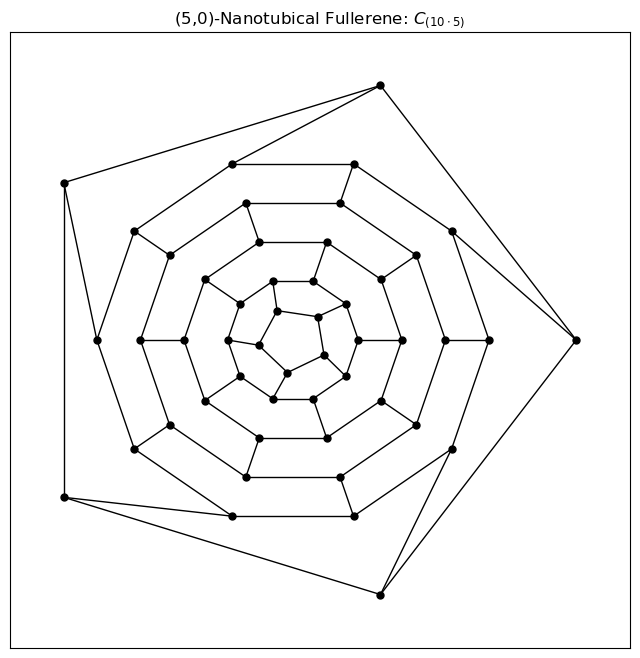

In [6]:
# Ustvari (5,0)-Nanotubical Fullerene graf za k=100 z zigzag povezavami
G = ntf(k=5, zigzag=True)

# Vizualiziraj graf
G.plot_graph(node_size=25, font_size=0, node_color="black", edge_color="black")

# Pretvori graf v različne formate
edge_list = G.convert_graph(format="edge_list")
adjacency_list = G.convert_graph(format="adjacency_list")
adjacency_matrix = G.convert_graph(format="adjacency_matrix")


In [3]:
# Naredimo graf
graf_primer = ntf(k=10)

# Izberemo poljubno vozlišče v grafu
v = 36

# Izračun L(v)
L_v = graf_primer.compute_L_vector(v)

# L(v)
print(f"L({v}) = {L_v}")

DV_v = graf_primer.compute_DV_vector(v)
print(f"DV({v}) = {DV_v}")




L(36) = [0, 0, 2, 3, 5, 6, 7, 6, 6]
DV(36) = [1, 3, 6, 9, 12, 14, 14, 13, 12, 6, 5, 5]


In [2]:
k = 22
test_za_eccentrično_povezanost = ntf(k)  # naredimo nanotub za k
indeks_eccentrične_povezanosti = test_za_eccentrično_povezanost.compute_eccentric_connectivity()
print(f"Indeks eccentrične povezanosti: {indeks_eccentrične_povezanosti}")
pricakovan_rezultat_za_eccentrično_povezanost = 45 * (k**2) - 15 * k
print(pricakovan_rezultat_za_eccentrično_povezanost)

Indeks eccentrične povezanosti: 21450
21450
